In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [24]:
def calc_mse(y, y_pred):
    """средняя квадратическая ошибка"""
    err = np.mean((y - y_pred)**2)
    return err

In [25]:
X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      bias=0, # intersept=0   
                                      coef=True, 
                                      random_state=42)

In [26]:
coef

array([40.71064891,  6.60098441])

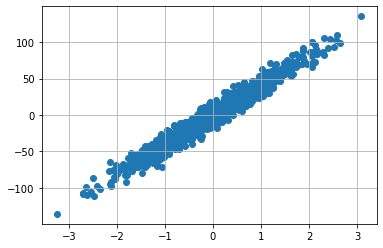

In [27]:
plt.scatter(X_[:, 0], y_);
plt.grid()

In [28]:
def eval_GD(X, y, iterations, eta=1e-4):
    """метод градиентного спуска"""
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
        errors.append(err)
    return w, errors

In [29]:
def eval_SGD(X, y, iterations, eta=1e-4):
    """стохастический градиентный спуск"""
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    errors = []
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
        errors.append(err)
    return w, errors

In [30]:
%%time

w_gd, err_gd = eval_GD(X_, y_, iterations=1000, eta=1e-3)

100: weights=[7.32874893 1.16801485], MSE=1103.189
200: weights=[13.00512448  2.22541594], MSE=767.897
300: weights=[17.72134432  3.08125022], MSE=536.838
400: weights=[21.63983474  3.77385273], MSE=377.594
500: weights=[24.89554186  4.33428243], MSE=267.836
600: weights=[27.60058142  4.78770076], MSE=192.180
700: weights=[29.84810175  5.15448943], MSE=140.027
800: weights=[31.71549299  5.45115674], MSE=104.072
900: weights=[33.26705326  5.69107223], MSE=79.283
1000: weights=[34.55620366  5.88506234], MSE=62.191
CPU times: user 57.4 ms, sys: 3.79 ms, total: 61.2 ms
Wall time: 58.9 ms


In [31]:
%%time

w_sgd, err_sgd = eval_SGD(X_, y_, iterations=1000, eta=1e-3)

100: weights=[5.65425267 1.36197629], MSE=1205.412
200: weights=[12.7105185   3.55875223], MSE=777.747
300: weights=[17.03707268  4.31522315], MSE=557.260
400: weights=[22.08826107  5.2663299 ], MSE=354.413
500: weights=[25.87193649  5.6555326 ], MSE=234.136
600: weights=[28.44101069  5.83399449], MSE=168.474
700: weights=[30.47041536  5.98949961], MSE=126.357
800: weights=[32.21255052  6.06519403], MSE=94.853
900: weights=[33.73922351  6.1450052 ], MSE=72.050
1000: weights=[34.6055792   6.40988743], MSE=60.892
CPU times: user 81.8 ms, sys: 3.47 ms, total: 85.3 ms
Wall time: 82.9 ms


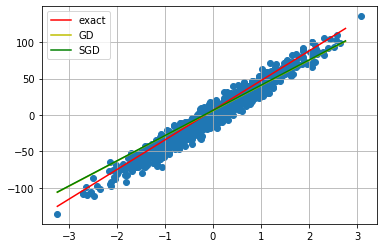

In [32]:
x = np.arange(np.min(X_[:, 0]), np.max(X_[:, 0]))
y0 = coef[1] + x*coef[0]
y1 = w_gd[1] + x*w_gd[0]
y2 = w_sgd[1] + x*w_sgd[0]

plt.scatter(X_[:, 0], y_)
plt.plot(x, y0, c='r', label="exact")
plt.plot(x, y1, c='y', label="GD")
plt.plot(x, y2, c='g', label="SGD")
plt.grid()
plt.legend()

Text(0, 0.5, 'Ошибка (MSE)')

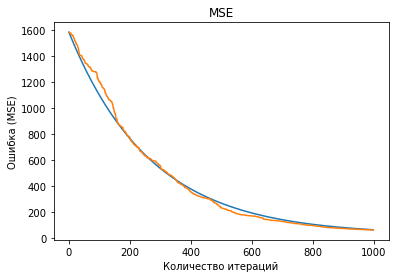

In [33]:
plt.plot(range(len(err_gd)), err_gd)
plt.plot(range(len(err_sgd)), err_sgd)
plt.title("MSE")
plt.xlabel("Количество итераций")
plt.ylabel("Ошибка (MSE)")

2. [\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).

In [34]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]]).T  # возраст репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [35]:
# веса по МНК
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([ 5.31431473e+01,  5.13381190e+00,  6.37461212e-03, -5.44708363e-01])

In [37]:
def standardization(x: np.ndarray) -> np.ndarray:
    return (x - x.mean()) / x.std()

In [38]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standardization(X[:, 1])
X_st[:, 2] = standardization(X[:, 2])
X_st[:, 3] = standardization(X[:, 3])
X, X_st

(array([[   1,    1,  500,   21],
        [   1,    1,  700,   25],
        [   1,    2,  750,   27],
        [   1,    1,  600,   20],
        [   1,    3, 1450,   25],
        [   1,    0,  800,   18],
        [   1,    5, 1500,   35],
        [   1,   10, 2000,   60],
        [   1,    1,  450,   20],
        [   1,    2, 1000,   30]]),
 array([[ 1.        , -0.57142857, -0.97958969, -0.60595294],
        [ 1.        , -0.57142857, -0.56713087, -0.264571  ],
        [ 1.        , -0.21428571, -0.46401617, -0.09388003],
        [ 1.        , -0.57142857, -0.77336028, -0.69129842],
        [ 1.        ,  0.14285714,  0.97958969, -0.264571  ],
        [ 1.        , -0.92857143, -0.36090146, -0.86198939],
        [ 1.        ,  0.85714286,  1.08270439,  0.58888384],
        [ 1.        ,  2.64285714,  2.11385144,  2.72252095],
        [ 1.        , -0.57142857, -1.08270439, -0.69129842],
        [ 1.        , -0.21428571,  0.05155735,  0.16215642]]))

In [36]:
def eval_model_reg2(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [44]:
def eval_model_reg1(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + lambda_ * np.array([q / abs(q) if q != 0 else 0 for q in w]))
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [85]:
NITER = 10**4

In [86]:
w = eval_model_reg2(X_st, y, iterations=NITER, eta=1e-3, lambda_=0.001, verbose=True)

1000: weights=[49.68015829  3.29138843  4.15121494  3.82602776], MSE=105.960
2000: weights=[56.3097975   3.62320588  4.49897347  3.18224947], MSE=46.670
3000: weights=[57.20343391  3.96183507  4.71850356  2.62427212], MSE=45.039
4000: weights=[57.32389084  4.30890682  4.85372538  2.13961316], MSE=44.630
5000: weights=[57.34012773  4.65793586  4.92889857  1.71138101], MSE=44.314
6000: weights=[57.34231637  5.00437052  4.96152365  1.32718145], MSE=44.042
7000: weights=[57.34261138  5.34507947  4.96423453  0.97790931], MSE=43.801
8000: weights=[57.34265115  5.67795324  4.94614284  0.65684649], MSE=43.584
9000: weights=[57.34265651  6.00161582  4.91381115  0.3590085 ], MSE=43.386
10000: weights=[57.34265723  6.31521605  4.8719577   0.08067117], MSE=43.205


In [87]:
w = eval_model_reg1(X_st, y, iterations=NITER, eta=1e-3, lambda_=0.001, verbose=True)

1000: weights=[49.7139524   3.29123406  4.15279816  3.8280256 ], MSE=105.440
2000: weights=[56.36145518  3.62246638  4.50167838  3.18382783], MSE=46.561
3000: weights=[57.25929697  3.96125804  4.72246077  2.62446736], MSE=45.020
4000: weights=[57.38056355  4.30927755  4.8588305   2.13772742], MSE=44.623
5000: weights=[57.39694236  4.66001891  4.9349113   1.70687019], MSE=44.307
6000: weights=[57.39915455  5.00889063  4.96814367  1.31960037], MSE=44.034
7000: weights=[57.39945334  5.35271169  4.97114663  0.96687786], MSE=43.792
8000: weights=[57.3994937   5.68931861  4.95304245  0.6420291 ], MSE=43.572
9000: weights=[57.39949915  6.01728061  4.92041755  0.34010217], MSE=43.372
10000: weights=[5.73994999e+01 6.33569303e+00 4.87801973e+00 5.73985324e-02], MSE=43.189


In [88]:
w_list_2 = []
l_list_2 = []
error_list_2 = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list_2.append(l)
    w_new = eval_model_reg2(X_st, y, iterations=NITER, eta=1e-2, lambda_=l)
    w_list_2.append(w_new)
    error_list_2.append(calc_mse(y, np.dot(X_st, w_new)))
weights_2 = np.array(w_list_2)
errors_2 = np.array(error_list_2)

In [89]:
w_list_1 = []
l_list_1 = []
error_list_1 = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list_1.append(l)
    w_new = eval_model_reg1(X_st, y, iterations=NITER, eta=1e-2, lambda_=l)
    w_list_1.append(w_new)
    error_list_1.append(calc_mse(y, np.dot(X_st, w_new)))
weights_1 = np.array(w_list_1)
errors_1 = np.array(error_list_1)

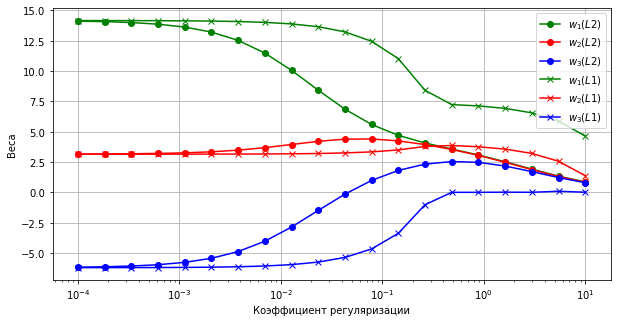

In [90]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
#plt.plot(l_list, weights[:, 0], 'mo-', label=r'$w_0$')
plt.plot(l_list_2, weights_2[:, 1], 'go-', label=r'$w_1 (L2)$')
plt.plot(l_list_2, weights_2[:, 2], 'ro-', label=r'$w_2 (L2)$')
plt.plot(l_list_2, weights_2[:, 3], 'bo-', label=r'$w_3 (L2)$')
plt.plot(l_list_1, weights_1[:, 1], 'gx-', label=r'$w_1 (L1)$')
plt.plot(l_list_1, weights_1[:, 2], 'rx-', label=r'$w_2 (L1)$')
plt.plot(l_list_1, weights_1[:, 3], 'bx-', label=r'$w_3 (L1)$')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('Веса')
plt.grid()
plt.legend()

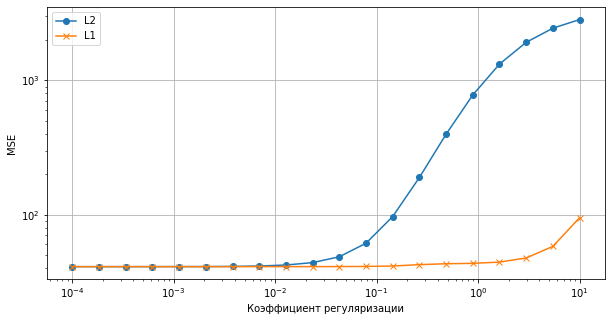

In [91]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.yscale('log')
plt.plot(l_list_2, errors_2, 'o-', label='L2')
plt.plot(l_list_1, errors_1, 'x-', label='L1')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('MSE')
plt.grid()
plt.legend()